In [344]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [346]:
print(os.listdir("../input"))
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

['house-prices-advanced-regression-techniques']


In [347]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [348]:
print(test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [349]:
print(train.info())
print("*"* 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n


 mu = 180921.20 and sigma = 79415.29



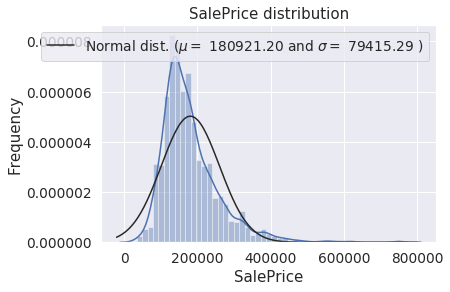

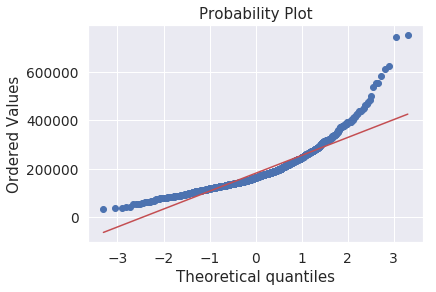

In [350]:
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

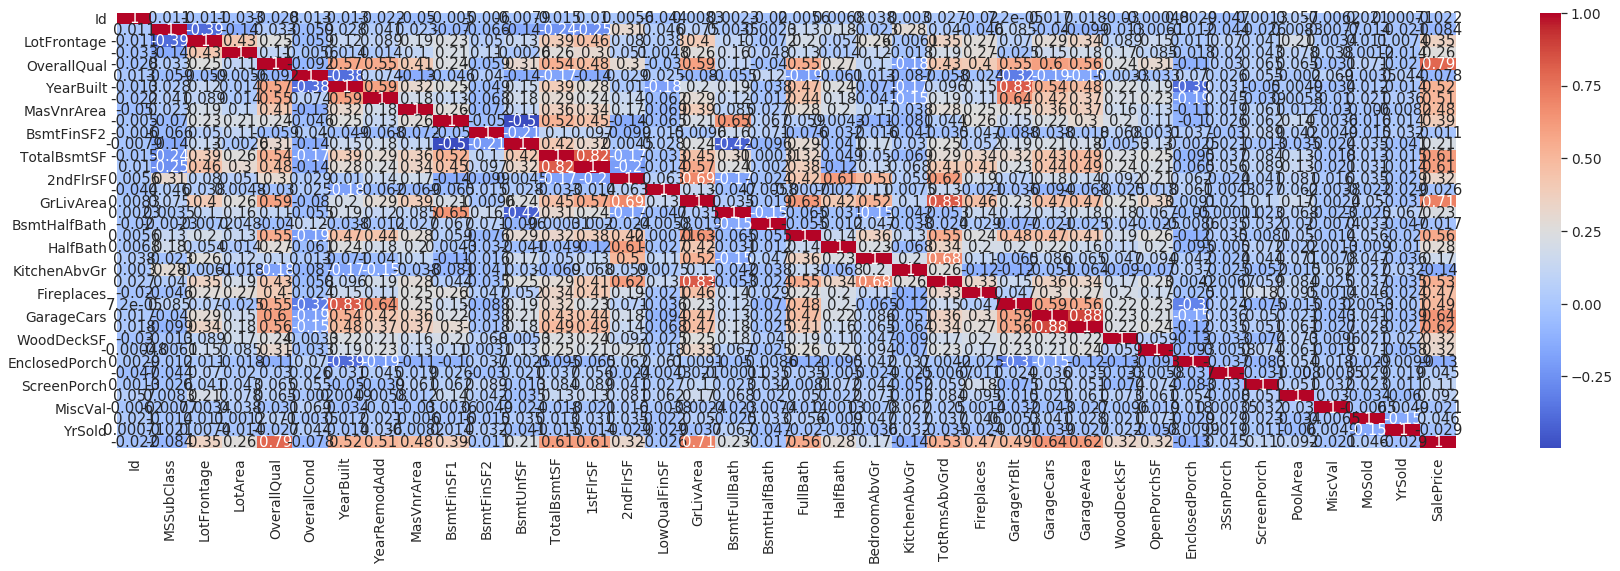

In [351]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(), cmap='coolwarm',annot = True)
plt.show()

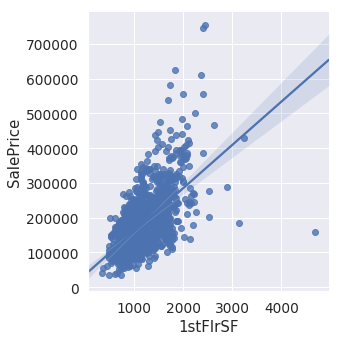

In [352]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

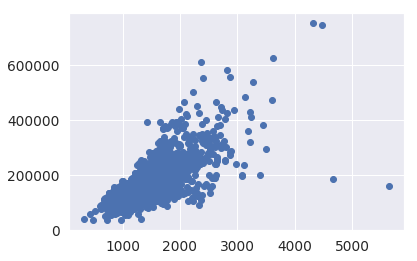

In [353]:
plt.scatter(x='GrLivArea',y='SalePrice',data=train)

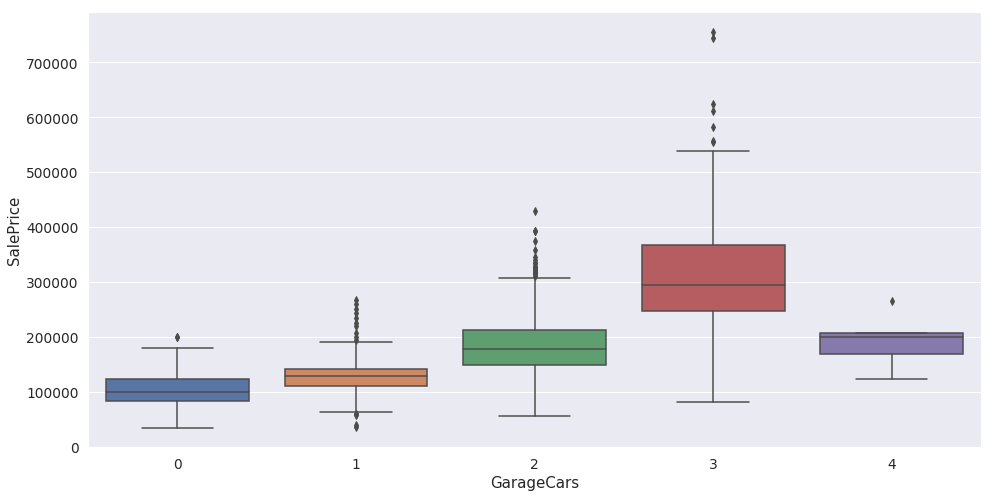

In [354]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars', y='SalePrice',data =train)
plt.show()

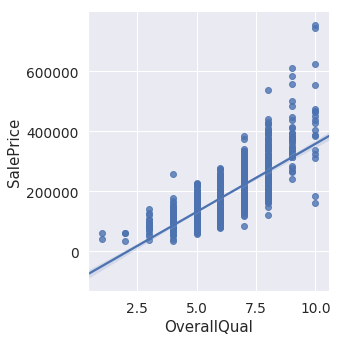

In [355]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

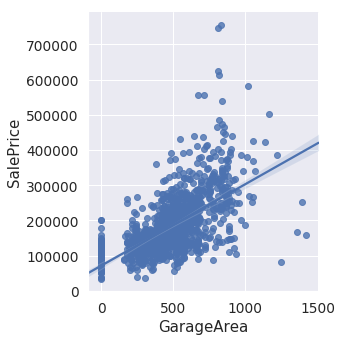

In [356]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

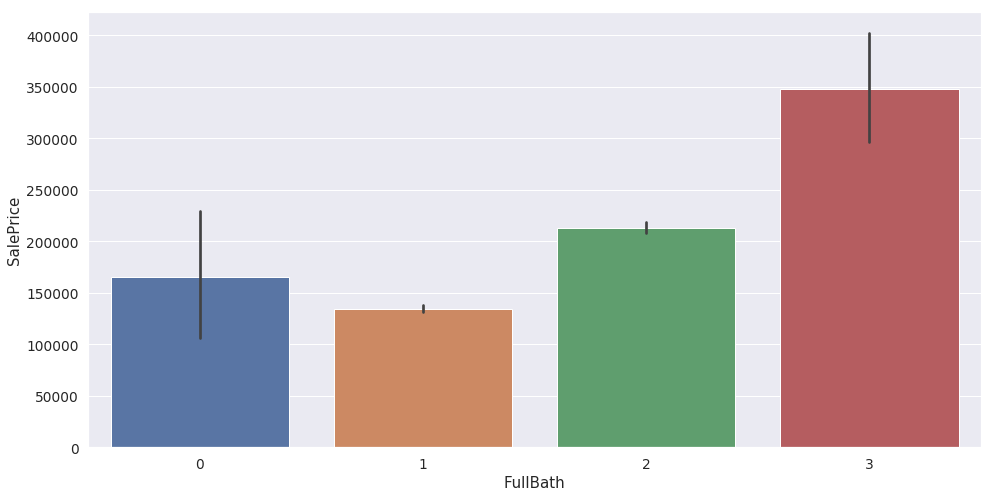

In [357]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

In [358]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [359]:
train = train.drop((missing_data[missing_data['Total']>81]).index,1)

In [360]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

In [361]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [362]:
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [363]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageCond      78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFullBath     2
Exterior2nd      1
Exterior1st      1
KitchenQual      1
dtype: int64

In [364]:
categorical_feature_mask = train.dtypes==object
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [365]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [366]:
categorical_feature_mask_test = test.dtypes == object
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [367]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [368]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [369]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [370]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SalePrice        0
YearRemodAdd     0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
Foundation       0
YearBuilt        0
dtype: int64

In [371]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
GarageArea       1
BsmtUnfSF        1
BsmtFinSF1       1
GarageCars       1
BsmtFinSF2       1
LandSlope        0
Neighborhood     0
MSSubClass       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
dtype: int64

In [372]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

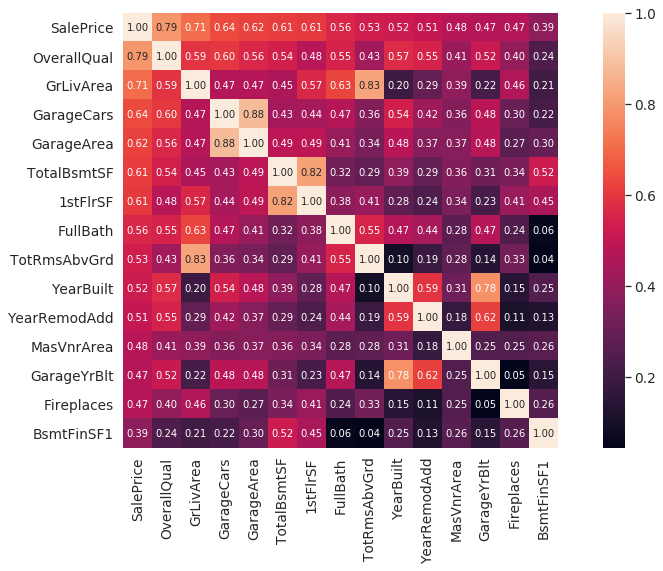

In [373]:
k=15
plt.figure(figsize=(16,8))
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values )
plt.show()

In [374]:
train = train[cols]

In [375]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [376]:
test= test[cols.drop('SalePrice')]

In [377]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
Fireplaces       0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
GrLivArea        0
OverallQual      0
dtype: int64

In [378]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [379]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

Linear Regression

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice',axis=1), train['SalePrice'], test_size=0.3, random_state=100)

In [381]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [382]:
print(y_train.shape)
print(y_test.shape)

(1022, 1)
(438, 1)


In [383]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [384]:
X_train

array([[-0.78071743, -1.22904426, -2.36814796, ..., -0.01108527,
        -0.92630957,  0.04264421],
       [ 0.64919872,  2.12232651,  1.64552901, ...,  0.59469948,
         0.62309858,  1.1595894 ],
       [-0.06575935, -0.05738097, -1.03025564, ..., -1.24432568,
         0.62309858, -0.762245  ],
       ...,
       [ 2.07911488,  0.66103858,  0.30763669, ...,  1.17984385,
         0.62309858, -0.96454336],
       [-0.78071743, -0.54071558,  0.30763669, ..., -0.53379323,
        -0.92630957, -0.96454336],
       [ 0.64919872,  0.93185642,  0.30763669, ...,  0.76188359,
         0.62309858,  0.89057562]])

In [385]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [386]:
lm.fit(X_train, y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [387]:
print(lm.intercept_)

[4.48076619e-16]


In [388]:
print(lm.coef_)

[[ 0.32849976  0.27364281  0.1157034   0.00956292  0.05649842  0.05534934
  -0.01495324  0.00604237  0.07061156  0.09121351  0.05884171  0.0171032
   0.07660783  0.08993527]]


In [389]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

In [390]:
print(predictions)

[[-1.02545051e+00]
 [ 2.64875528e-01]
 [ 1.89363467e-01]
 [ 3.51752211e-01]
 [-3.43358342e-01]
 [ 4.64055553e-01]
 [ 5.67832386e-01]
 [ 1.12725407e+00]
 [-9.85668670e-01]
 [ 1.62453180e-01]
 [ 1.54527141e-01]
 [ 1.99366999e-01]
 [-1.36478806e-01]
 [ 8.01576151e-02]
 [-1.03921019e+00]
 [-7.67177490e-01]
 [ 2.21021489e-01]
 [-7.69388376e-01]
 [-9.94587736e-01]
 [-7.65342471e-01]
 [-2.42745643e-01]
 [-1.04707143e+00]
 [-3.46660497e-01]
 [-7.16906798e-01]
 [ 2.39890103e-01]
 [-5.39353218e-01]
 [-2.87116602e+00]
 [-1.38368942e+00]
 [ 1.98116095e-01]
 [-6.10970756e-01]
 [-4.61012141e-01]
 [ 6.38982008e-01]
 [ 7.91162194e-01]
 [-1.71590617e+00]
 [-8.56770747e-01]
 [-1.56447650e+00]
 [-9.51732374e-01]
 [-1.53374314e+00]
 [-2.83628824e-01]
 [-7.52872675e-01]
 [ 1.80603370e+00]
 [ 5.76479088e-01]
 [-3.71208966e-01]
 [-1.38946905e+00]
 [-3.25133610e-01]
 [-1.98414026e+00]
 [ 1.26028644e+00]
 [-1.93942030e-01]
 [-6.42323195e-01]
 [-1.22329124e+00]
 [ 7.88416053e-01]
 [-1.07368933e+00]
 [ 1.9009302

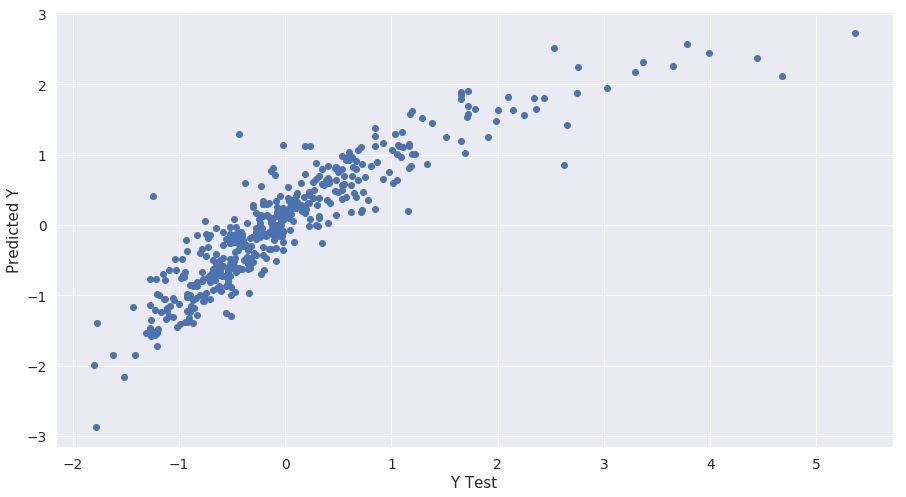

In [391]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

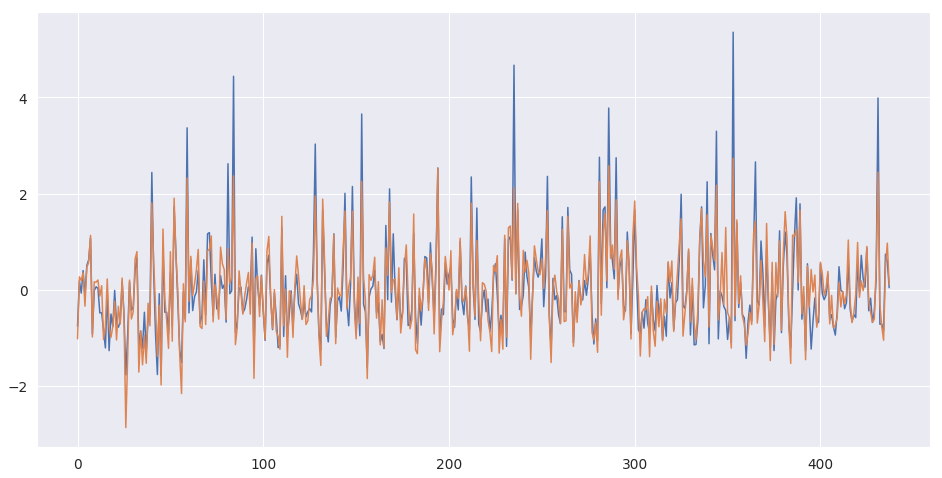

In [392]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [393]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2996072238659954
MSE: 0.19038792265849314
RMSE: 0.43633464526495386


In [394]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [395]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [396]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [397]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.24588765945018123
MSE: 0.14272229449570387
RMSE: 0.3777860432780754


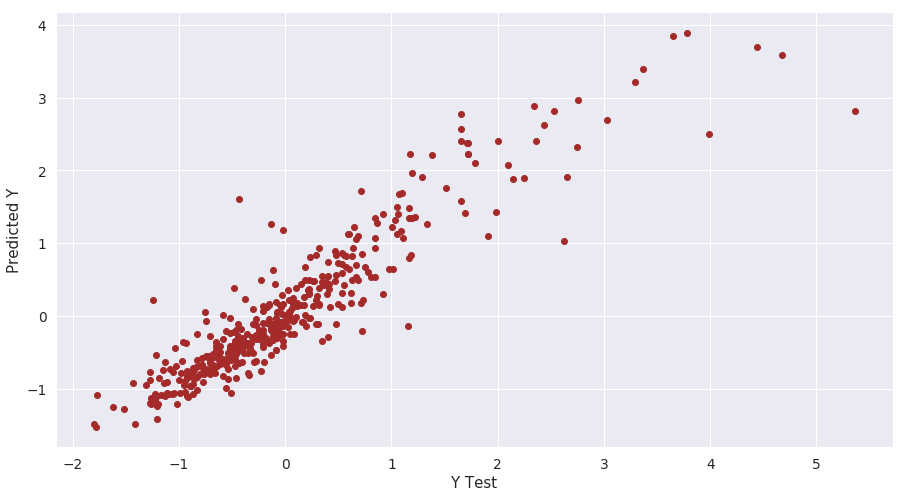

In [398]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

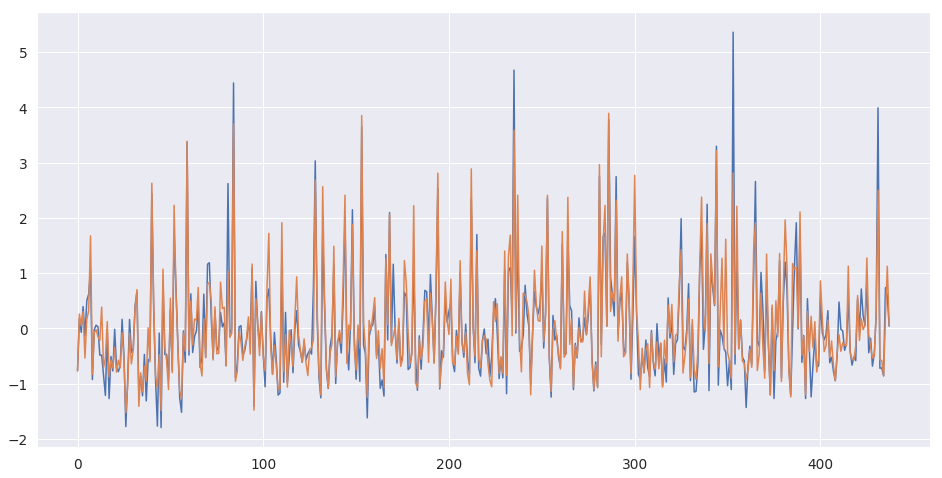

In [399]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

Decision Tree Regression

In [400]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [401]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [402]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.37791859116403237
MSE: 0.33131040384726373
RMSE: 0.5755956947782565


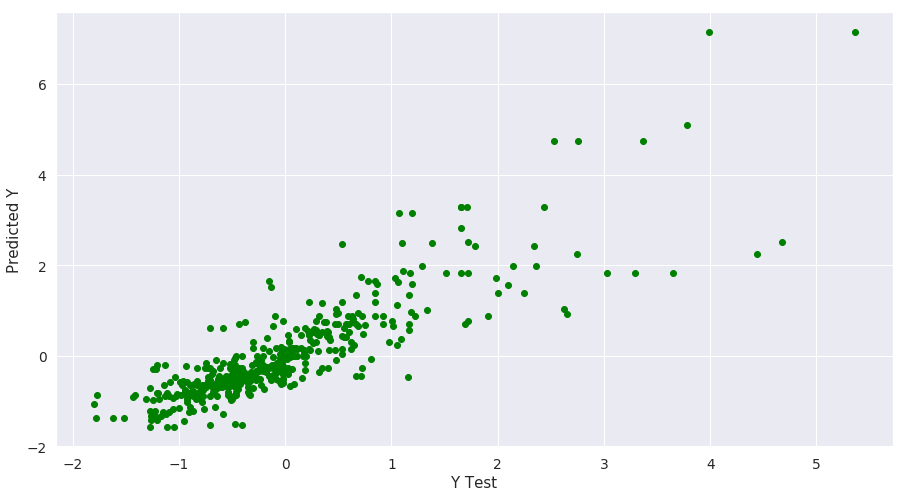

In [403]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

SVR

In [404]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [405]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [406]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.2630530096786339
MSE: 0.17965467133876564
RMSE: 0.4238568996002845


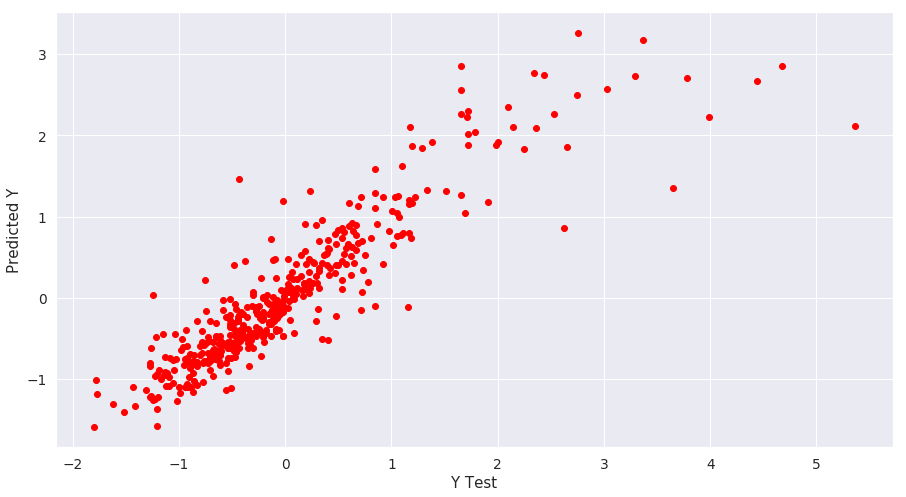

In [407]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

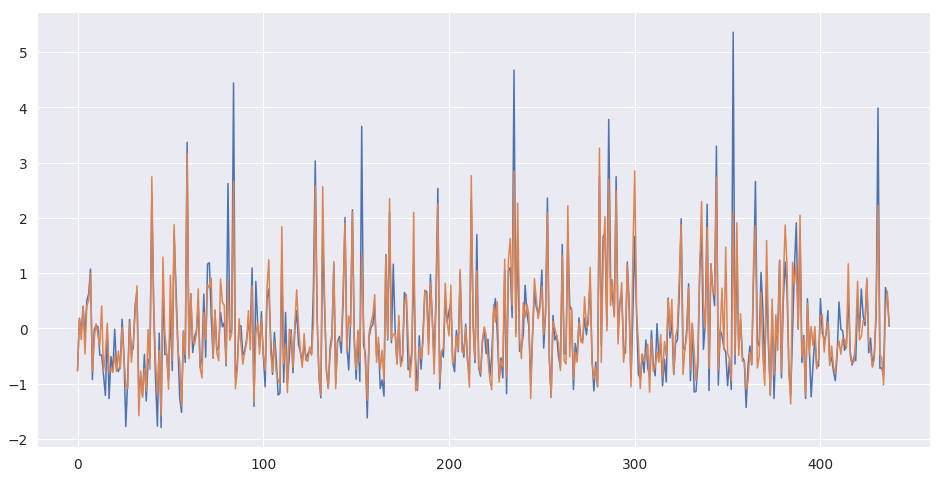

In [408]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

Random Forest Regression

In [409]:
from sklearn.ensemble import RandomForestRegressor

In [410]:
rfr = RandomForestRegressor(n_estimators = 500, random_state =0)
rfr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [411]:
rfr_pred= rfr.predict(X_test)

rfr_pred = rfr_pred.reshape(-1,1)

In [412]:
print(rfr_pred.shape)

(438, 1)


In [413]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.2580963877300974
MSE: 0.14969428461861867
RMSE: 0.3869034564573166


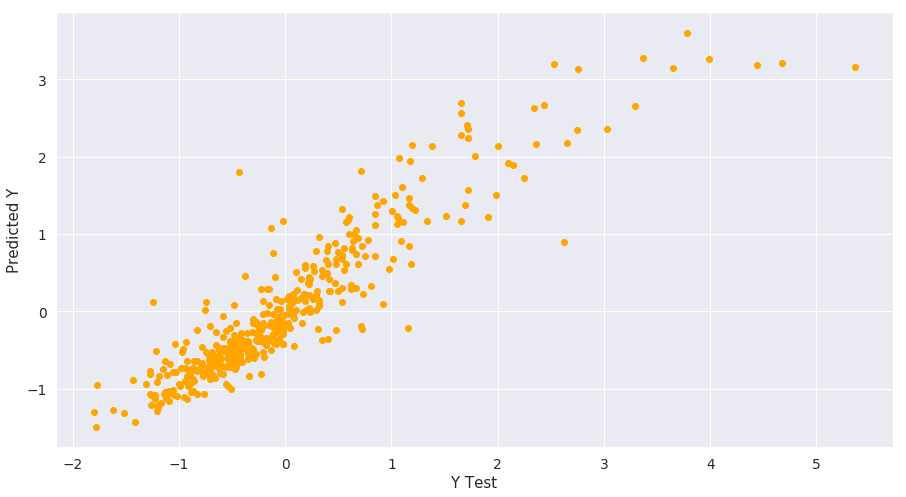

In [414]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

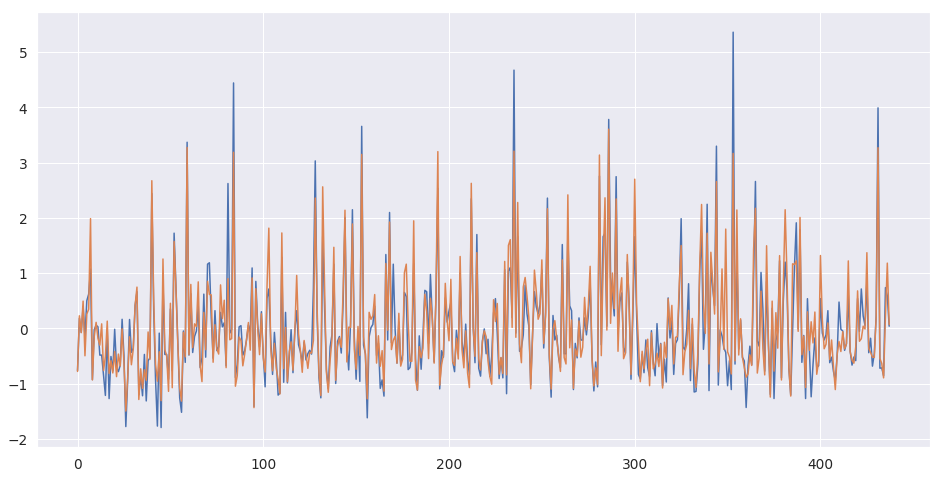

In [415]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

LightGBM

In [416]:
import lightgbm as lgb

In [417]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,learning_rate=0.01, n_estimators=3000,max_bin=55, bagging_fraction =0.8, bagging_freq = 5, feature_fraction = 0.2319, feature_fraction_seed = 9 , baggin_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf = 11)

In [418]:
model_lgb.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(baggin_seed=9, bagging_fraction=0.8, bagging_freq=5,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.01, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=3000, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [419]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [420]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.25605739629786894
MSE: 0.1772804932276641
RMSE: 0.42104690145833407


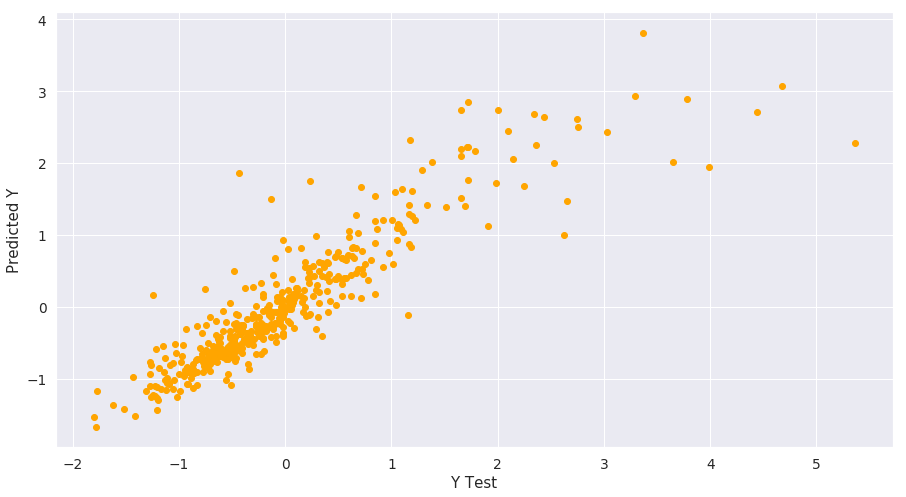

In [421]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

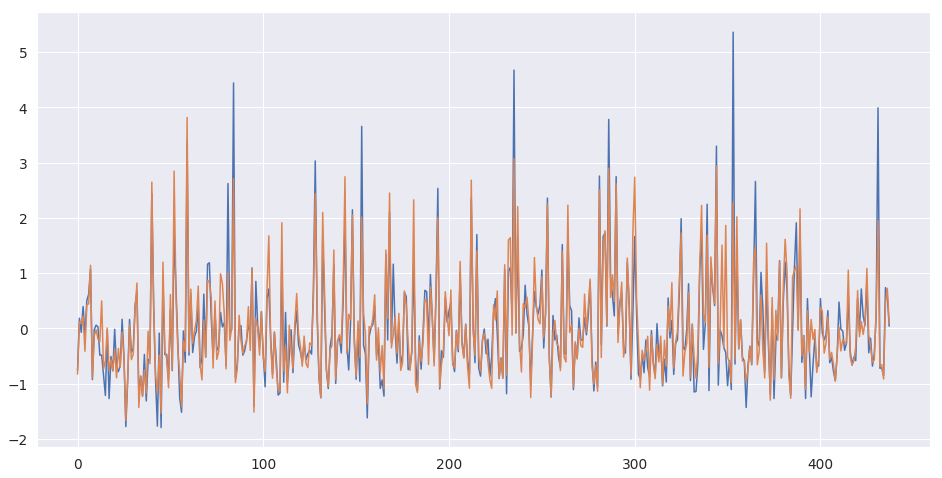

In [422]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lgb_pred, label = 'predict')
plt.show()

Model Comparison

In [423]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

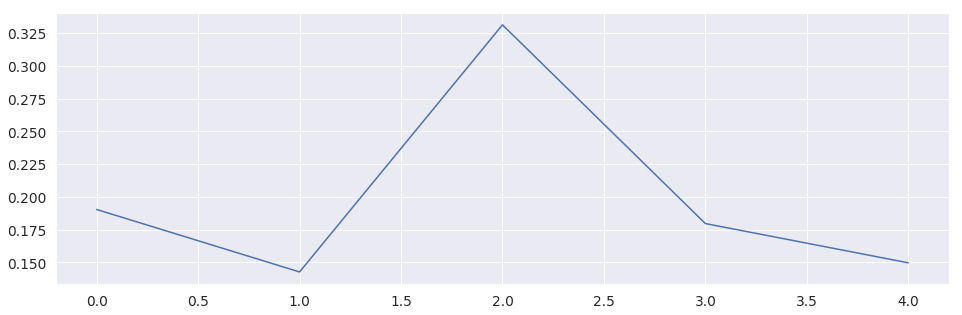

In [424]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [425]:
a=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [426]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [428]:
test = sc_X.fit_transform(test)

In [429]:
test.shape

(1459, 14)

In [430]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

In [431]:
test_prediction_lgbm

array([[-0.75552379],
       [-0.38608683],
       [ 0.10181371],
       ...,
       [ 0.08484293],
       [-0.69311672],
       [ 0.87240583]])

In [432]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [433]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [434]:
test_prediction_lgbm.head()

,SalePrice
0,121227.956130
1,150864.577306
2,190004.469875
3,191707.251736
4,196863.981376


In [435]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [436]:
result.head()

,Id,SalePrice
0,1461,121227.956130
1,1462,150864.577306
2,1463,190004.469875
3,1464,191707.251736
4,1465,196863.981376


In [437]:
result.to_csv('submission.csv',index=False)